### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

Dependent Variable refers to the variable(s) that is being tested. The results of the dependent variable is dependent on the independent variable. For the purpose of this project/question, the dependent variable is the "Response Time", that is measured in seconds. 

Independent variables refers to the variables or rather factors that may or may not have an effect on the dependent variable. Independent variables are changed or controlled to see their effect on the dependent variable(s). For the purpose of this project/question, the independent variable is the "Word Condition", with two possibilities: Congruent or Incongruent. 

Summary: 
DEPENDENT: Response Time in seconds
INDEPENDENT: Word Condition (Congruent or Incongruent)

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Hypothesis:
Null Hypothesis (H0): ( μi - μc = 0 ) There is no significant difference in the population average response time in viewing the congruent(c) words vs viewing the incongruent(i) words.

Alternative Hypothesis (H1): ( μi - μc = > 0 (positive) ) There is a significant difference (increase), in the population average response times for the incongruent word condition.

Summary: 
H0 = NO difference
H1 = There is a difference (statistically significant)


Statistical Test: 
The investigation looks at the dependent variable is the response time (difference in seconds) between the two word conditions, which means the investigation will need to compare the means and variations of the response time between the two word conditions, and whether it overlaps and is different. 

Therefore, the dependent sample t-test (one-tailed) will be selected for this investigation. This test compares the difference in means between the two independent word variables and takes into account the standard deviation between the means. The results of the comparison will allow us to determine whether the difference (in means) is significant (statistically). This in turn will the us to determine whether to accept or reject the null hypothesis. 

The dependent sample t-test is selected for several reasons:
1) Small Sample size = Sample size is less than 30. Therefore it (sample) is unlikely to approximate a normal distribution (especially since we are not aware of the population variance), which eliminates the use of a z-value.
2) One-tailed = Since it is expected that the incongruent will not improve response time, the one-tailed test is chosen as it will allow for a more scrutious examination of the incongruent word condition and its effect on response time.
3) Same Subject = The same subject population, that are exposed to the different word condition (and tested for each), therefore dependent version of the t-test is selected. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Stage 1a - Preparation of Battlefield - Loading of all relevant dependancies and libaries
import pandas as pd # To contain data
import os # Set path
import scipy.stats as stats # Import Statistical Package for analysis
import matplotlib.pyplot as plt  # For Visualisation
%matplotlib inline


# Stage 1b - Loading and Reconnaisance of Data
path = os.getcwd()
print(path) # Get the working directory - Fingerprint
df = pd.read_csv(path + '/stroopdata.csv')
df.head() # Reconnaisance of Data - Preview of dataframe

C:\Users\sofya_000\Python Notebooks\Udacity Nanodegree\Data Analyst\Project - Test a Perceptual Phenomenon


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# Stage 1c - Preparation of data - Proper Indexing
df['Subject'] = df.index+1 # Addition of 'Subject' Column
df.index = df['Subject'] # Reindexing
del df['Subject'] # Removal of 'Subject' Column
df.head() # Check dataframe - with the new index
# End of Stage 1

,Congruent,Incongruent
Subject,,
1,12.079,19.278
2,16.791,18.741
3,9.564,21.214
4,8.630,15.687
5,14.669,22.803


In [3]:
# Stage 2 - Analysis of Data
# General Statistics 
df.describe() # Using pandas in-build describe function
# End of Stage 2

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Central tendency refers to a summary measure that use a single value to attempt to describe the center of the distribution of the data. For the purpose of this project/question; Mean will be used.
Mean of:
Congruent = 14.0511
Incongruent = 22.0159

Variability refers to a summary measure of the dispersion or 'spread' of the datain relation to the mean. For the purpose of this project/question; Standard Deviation (std) will be used. 

Standard Deviation (std) of:
Congruent = 3.559358
Incongruent = 4.797057

The rest of the decriptive statistics (min, max, percentile) can be seen in the table above.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

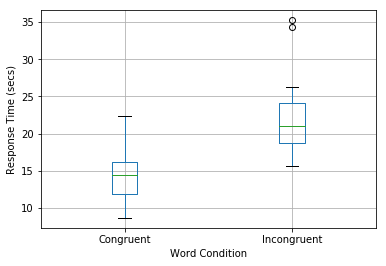

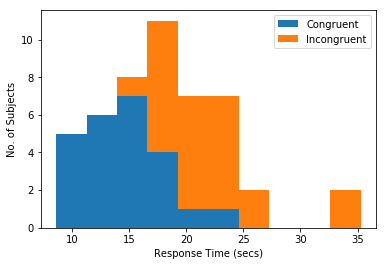

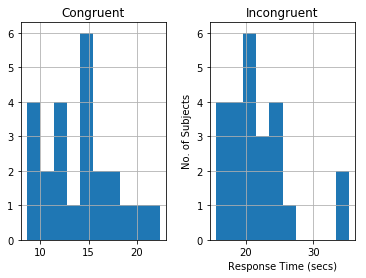

In [4]:
# Stage 3 - Visualisation of Data
# Boxplot - Show the mean and variability and whether they overlap 
df.boxplot()
plt.xlabel('Word Condition')
plt.ylabel('Response Time (secs)')

# Histogram - Show distribution of Subjects's across different response times.
df.plot(kind='hist', stacked=True, bins=10)
plt.xlabel('Response Time (secs)')
plt.ylabel('No. of Subjects')
plt.show()
df.hist(bins=10)
plt.xlabel('Response Time (secs)')
plt.ylabel('No. of Subjects')
plt.show()
# End of Stage 3

General Exploration:
Boxplot:
Since we are looking at the means between the two word conditions, we use a boxplot to show the mean and the standard deviation and assess how different the mean is and whether there is any overlap between the standard deviation. If there is no difference observed visually here, it is unlikely that there will be any statistical difference and may not be worth further investigation.

From the boxplot we can see there there is a significant (visually) difference between the mean, with mean of the incongruent close to the top end of the standard deviation of the congruent. It was also observed that the standard deviation of the incongruent was also above the mean of the congruent. 

This suggest possible statistical difference and warrants further investigation


Histogram:
While a boxplot shows the overview or mean and variability of the data, it does not show the actual "weight"/"concentration" or spread of the data. This is where a histogram comes in, it shows the number of subjects at each level of response time and thus allows us to look at the concentration of the data. 

From the histogram, we can see that there is difference in concentration for each word condition. From the shape of the histogram, it may also be better to use one-tail analysis, since the concentration in one tail and the difference is on the increase in response time. 


(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [5]:
# Stage 4 - Statistical Testing of Data
# Preparation of Variables - Labelling
n = len(df) # Sample Size
c = df['Congruent']
i = df['Incongruent']

# Running t-test (repeated sampling from the same unit)
ttest = stats.ttest_rel(c,i) 

# Printing Results
print("Sample Size (n) =", n, "subjects")
print("Degrees of Freedom (df) =", (n-1))
print("T-Test Result =", ttest)

# End of Stage 4
# End of Project

Sample Size (n) = 24 subjects
Degrees of Freedom (df) = 23
T-Test Result = Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)


Statistical Parameters: 
Confidence level is set at 99 (α = .01).
Degrees of freedom = 23 (24 - 1)
t-critical value (1-sided test) = -2.50


Results: 
t-statistic > t-critical
-8.0207 > -2.50
p value = < .0001 (4.1030005857111781e-08)

Conclusion:
Null Hypothesis is rejected at an  α = 0.01. This is because the response time to the word condition is significantly different between the two word conditions (-8.0207 > -2.50). 
Based on this, it can be concluded that the subjects did not name colours at the same speed when the word (actual meaning) and its colors match, as when they do NOT match. 

Match:
The results is inline with the investigator's expectation. 



(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

This is due to the fact that there is a mismatch between the word (and its meaning) and the exact colour. When the mismatch happens, additional time is necessary for the brain (prefrontal cortex) to process the information and determine the meaning. 

Similiar results are likely observed if the subjects were shown words of the correct colour but the wrong text. However in this scenario, the difference are possibly lesser in magnitude as the visual color representation are likely to be more ingrained in the brain as compared to word shape associations. 


Reference (Statistics):
1. Wilson JH, Joye SW. Research Methods and Statistics - An Integrated Approach. Thousand Oaks, California: SAGE Publications, Inc; 2017.

Reference (Code): 
1. pandas. pandas 0.22.0 documentation. https://pandas.pydata.org/pandas-docs/stable/. Accessed January 17, 2018.

1. Matplotlib Development Team. Matplotlib Documentation. Matplotlib Documentation. https://matplotlib.org/contents.html. Accessed January 17, 2018.

1. Scipy. Numpy and Scipy Documentation. 2017. https://docs.scipy.org/doc/. Accessed January 17, 2018.


Report By:

Sofyan Sahrom

Student, Data Analyst Nanodegree (January 2018 - Cohort)
